# 1. Loading the Libraries and the data

In [21]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import SGDClassifier
from sklearn import svm
import matplotlib.pyplot as plt
import time

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [4]:
data_path = './data/'
run_walk = pd.read_csv(data_path + "run_or_walk.csv")

In [5]:
run_walk.head()

,date,time,username,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


# 2. Data preprocessing
- split up the dataset for the model training 
    - train : test = 8 : 2
- required data columns : 'date', 'time', 'username'

In [6]:
x = run_walk.drop(['date', 'time', 'username', 'activity'], axis=1)
y = run_walk['activity']

trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)

### Feature Scaling with Scikit-Learn
- important to scale the features when using the SGD Classifier

In [7]:
scaler = StandardScaler()
scaler.fit(trainX)
trainX = scaler.transform(trainX)
testX = scaler.transform(testX)

# 3 SGD-Classifier
- hyper parameter loss
    - clf = SGDClassifier(loss=‘hinge’) : implementation of Linear SVM
    - clf = SGDClassifier(loss=‘los’) : implementation of Logistic regression

## 3-1. Logistic Regression with SGD training

In [8]:
clf = SGDClassifier(loss="log", penalty="l2")
clf.fit(trainX, trainY)

SGDClassifier(loss='log')

In [9]:
y_pred = clf.predict(testX)

print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))


Accuracy: 0.85


- By the default the maximum number of passes over the training data is set to 1000.
- Let's check what influence this parameter has on our score(accuracy)

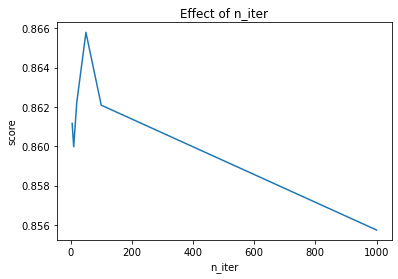

In [12]:
n_iters = [5, 10, 20, 50, 100, 1000]
scores = []
for n_iter in n_iters:
    clf = SGDClassifier(loss="log", penalty="l2", max_iter=n_iter)
    clf.fit(trainX, trainY)
    scores.append(clf.score(testX, testY))
  
plt.title("Effect of n_iter")
plt.xlabel("n_iter")
plt.ylabel("score")
plt.plot(n_iters, scores) 

## 3-2. Linear SVM with SGD training
- same calculation for the linear model of the SVM

In [13]:
clf = SGDClassifier(loss="hinge", penalty="l2")
clf.fit(trainX, trainY)

SGDClassifier()

In [14]:
y_pred = clf.predict(testX)

print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))

Accuracy: 0.86


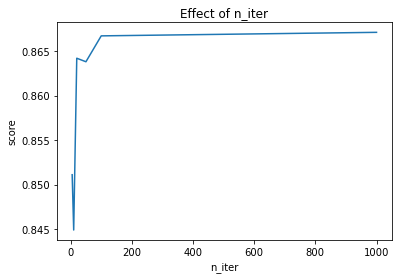

In [15]:
n_iters = [5, 10, 20, 50, 100, 1000]
scores = []
for n_iter in n_iters:
    clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=n_iter)
    clf.fit(trainX, trainY)
    scores.append(clf.score(testX, testY))
  
plt.title("Effect of n_iter")
plt.xlabel("n_iter")
plt.ylabel("score")
plt.plot(n_iters, scores)

### Compare Training Time : SVM vs SGD
- check the training time, clearly how much faster the SGD classifier works compared to the linear SVM

In [23]:
start = time.time()
clf = SGDClassifier(loss="hinge", penalty="l2")
clf.fit(trainX, trainY)
stop = time.time()
print(f"Training time for linear SVM with SGD training: {stop - start}s")

start = time.time()
clf = svm.SVC(kernel='linear')
clf.fit(trainX, trainY)
stop = time.time()
print(f"Training time for linear SVM without SGD training: {stop - start}s")

Training time for linear SVM with SGD training: 0.04152393341064453s
Training time for linear SVM without SGD training: 13.68741488456726s


# 4. Model improvement
## 4-1. Performance comparison of the different linear models
- check the performance of the different linear classifiers
    - 'hinge' gives the best score 
    - 'perceptron' gives the worst score

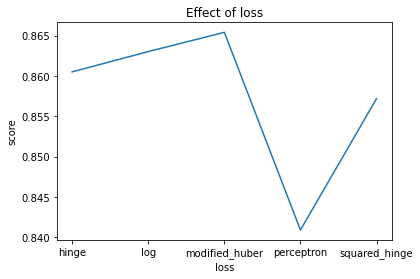

In [24]:
losses = ["hinge", "log", "modified_huber", "perceptron", "squared_hinge"]
scores = []
for loss in losses:
    clf = SGDClassifier(loss=loss, penalty="l2", max_iter=1000)
    clf.fit(trainX, trainY)
    scores.append(clf.score(testX, testY))
  
plt.title("Effect of loss")
plt.xlabel("loss")
plt.ylabel("score")
x = np.arange(len(losses))
plt.xticks(x, losses)
plt.plot(x, scores) 

## 6-2. GridSearch
- use the popular GridSeach method to find the most suitable hyperparameters

In [25]:
params = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber", "perceptron"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "elasticnet", "none"],
}

clf = SGDClassifier(max_iter=1000)
grid = GridSearchCV(clf, param_grid=params, cv=10)


grid.fit(trainX, trainY)

print(grid.best_params_) 

{'alpha': 0.1, 'loss': 'hinge', 'penalty': 'none'}


### Result
- Accuray could not be increased further
- get the Comfirmation that hinge(aka. linear SVM) with the parameters shown above in the best choice

In [26]:
grid_predictions = grid.predict(testX) 

print('Accuracy: {:.2f}'.format(accuracy_score(testY, grid_predictions)))

Accuracy: 0.87


# 7. Conclusion
- Worked out why there is SGD Classifier at all 
- Worked out what advantages they have over simple linear models
- the funcitonality of hyperparameter tuning was explained
